In [24]:
import pandas as pd
sp500_date = pd.read_csv('./data/sp500_date.csv', delimiter=',', index_col=False, header=0)
# predictions = pd.read_csv('.predictions/sp500_predictions_varlingam_lag_1.csv', delimiter=',', index_col=False, header=0)
# start_date = sp500_date.iloc[-(len(predictions)+1), 0]
end_date = str(sp500_date.iloc[-1, 0])
formatted_end_date = f"{end_date[:4]}-{end_date[4:6]}-{end_date[6:]}"
import yfinance as yf
data = yf.download("^GSPC", start=formatted_end_date)
print(data["Close"])

[*********************100%***********************]  1 of 1 completed

Date
2019-12-31    3230.780029
2020-01-02    3257.850098
2020-01-03    3234.850098
2020-01-06    3246.280029
2020-01-07    3237.179932
                 ...     
2024-09-20    5702.549805
2024-09-23    5718.569824
2024-09-24    5732.930176
2024-09-25    5722.259766
2024-09-26    5745.370117
Name: Close, Length: 1193, dtype: float64


In [1]:
# sp500_20171205 = 2629.57
# sp500_end = 3230.78
sp500_start = 3902.62 # 20220707
sp500_end = 5634.61
sp500_return = (sp500_end-sp500_start)/sp500_start
sp500_return

0.4438018561889192

In [57]:
import pandas as pd
predictions = pd.read_csv('./predictions/sp500_predictions_varlingam_lag_1.csv', delimiter=',', index_col=False, header=0)
backtest_returns = pd.read_csv('./backtesting/sp500_backtest_returns_varlingam_lag_1.csv', delimiter=',', index_col=False, header=0)

In [58]:
winner_num = backtest_returns.iloc[:,0].tolist()
ar = backtest_returns.iloc[:,1].tolist()
ar_self = backtest_returns.iloc[:,2].tolist()
baseline_annualized_return = (1+sp500_return)**(252/predictions.shape[0])-1
ar_baseline = [baseline_annualized_return]*len(winner_num)

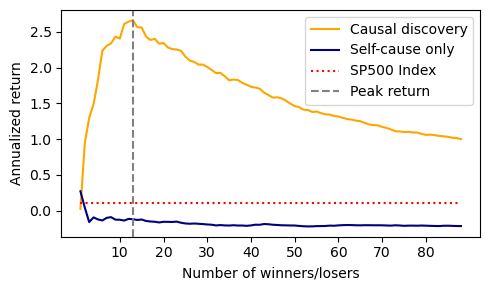

In [59]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,3))
plt.plot(winner_num, ar, label = 'Causal discovery', color = 'orange')
plt.plot(winner_num, ar_self, label = 'Self-cause only', color = 'navy')
plt.plot(winner_num, ar_baseline, label = 'SP500 Index', color = 'red', linestyle=':')
peak_index = np.argmax(ar)
peak_x = int(winner_num[peak_index])
peak_y = round(ar[peak_index],2)
plt.axvline(x=peak_x, color='gray', linestyle='--', label=f'Peak return')
# plt.text(peak_x, peak_y, f'({peak_x}, {peak_y})', fontsize=12, ha='left', va='baseline')
plt.xlabel('Number of winners/losers')
plt.ylabel('Annualized return')
plt.xticks([x for x in winner_num if x % 10 == 0])
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('./plots/sp500_portfolio_performance_plot_varlingam_lag_1.pdf')